# Gaussian Mixture Model : Unsupervised classification

Is a model that assumes data generated from a mixture of K Gaussian (bell shape) components.

## 1- Creating a synthetic DataSet

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points
n_samples = 2000

mu1, sigma1 = 0,1.2 # mean and variance
mu2, sigma2 = 10,1.8
mu3, sigma3 = 3,1.6

x1 = np.random.normal(mu1,np.sqrt(sigma1),n_samples)
x2 = np.random.normal(mu2,np.sqrt(sigma2),n_samples)
x3 = np.random.normal(mu3,np.sqrt(sigma3),n_samples) 

#x = np.array(list(x1) + list(x2) + list(x3))
#np.random.shuffle(x)

#print("Dataset shape:",x.shape)


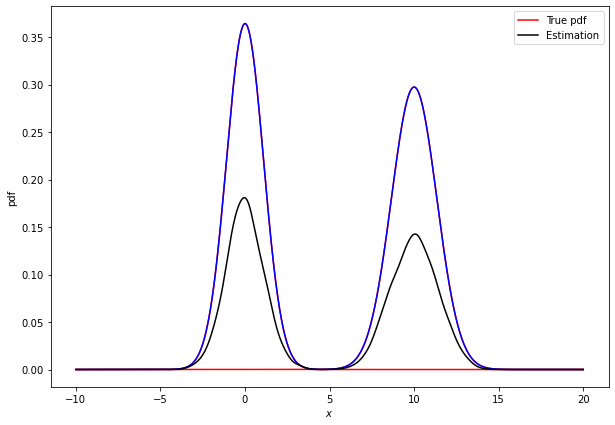

In [2]:
def pdf(loc,variance,observation):
    '''
    Parameters
    ----------
         loc: Mean of the distribution ; where the peak of the bell exists
         variance : variance
         sample : the distribution

    Returns
    -------
      
      PDF
    '''
    # A normal continuous random variable.
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(observation - loc)/(2*variance)))
    return s1 * s2

def kernel_function(x,givenData,h,d=1):
    '''
    Parameters
    ----------
         x: Observation data
         h: windows size
         d: dimension
         valueG: Gaussian value
    
    Returns
    -------
      the k value   
    '''
    
    result = np.exp((-1/2)* ((x- givenData)/h)**2)
    return result

def kernel_density_function(obs_data,givenData,h,d=1):
    '''
    Parameters
    ----------
         obs_data: Observation data  
         h: windows size
         d: dimension
         givenData: generate from gaussian

    Returns
    -------
      the KDF
    '''
    final_result = []
    # Size of the gaussian data
    size = len(givenData)
    for obs in obs_data:
        k_result = 0
        for g in givenData:
            k_result = k_result + ((1/ (size * h * np.sqrt(2*np.pi)))* kernel_function(obs,g,h))
        final_result.append(k_result)
    return final_result


# Visualize the training data
bins = np.linspace(-10,20,10000)
all_data = np.array(list(x1)+list(x2))

estimation = kernel_density_function(bins,all_data ,(1/np.sqrt(2000))*15)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")
#plt.scatter(x,[0.005]* len(x),color='navy',s=30, marker=2, label="Train data")
plt.plot(bins, pdf(mu1,sigma1,bins), color='red', label='True pdf')
plt.plot(bins, pdf(mu2,sigma2,bins), color='red')
#plt.plot(bins, pdf(mu3,sigma3,bins), color='red')

#Plotting the mix gaussian
plt.plot(bins, pdf(mu1,sigma1,bins)+ pdf(mu2,sigma2,bins), color='blue')
plt.plot(bins, estimation, color='black', label='Estimation')
plt.legend()
plt.show()

In [3]:
# define the number of clusters to be learned
k = 3
weights = np.ones((k)) / k
means = np.random.choice(x,k)
variances = np.random.random_sample(size=k)
print(means,variances)

x = np.array(x)
print(x.shape)

NameError: name 'x' is not defined

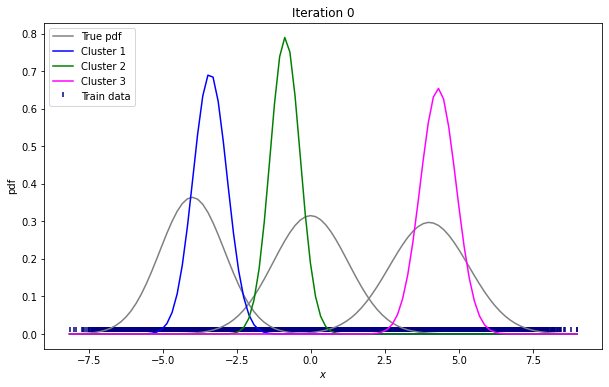

In [ ]:
eps = 1e-8

for step in range(25):
    if step % 1 == 0 :
        plt.figure(figsize=(10,6))
        axes = plt.gca()
        plt.xlabel("$x$")
        plt.ylabel("pdf")
        plt.title("Iteration {}".format(step))
        plt.scatter(x,[0.005]*len(x), color='navy', s=30, marker=2, label='Train data')

        plt.plot(bins, pdf(mu1,sigma1,bins), color='grey', label='True pdf')
        plt.plot(bins, pdf(mu2,sigma2,bins), color='grey')
        plt.plot(bins, pdf(mu3,sigma3,bins), color='grey')

        plt.plot(bins, pdf(means[0],variances[0],bins), color='blue', label='Cluster 1')
        plt.plot(bins, pdf(means[1],variances[1],bins), color='green', label='Cluster 2')
        plt.plot(bins, pdf(means[2],variances[2],bins), color='magenta', label='Cluster 3')

        plt.legend(loc='upper left')
        #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
        plt.show()
    
    # Calculate the maximum likelihood of each observation xi
    likelihood = []

    # Expectation step
    for j in range(k):
        likelihood.append(pdf(means[j],np.sqrt(variances[j]),x))
    likelihood = np.array(likelihood)

    b = []
    # Maximization step
    for j in range(k):
        # use the current values for the parameters to evaluate the posterior
        # probabilities of the data to have been generanted by each gaussian
        b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)],axis=0)+ eps))

        # update mean and variance
        means[j] = np.sum(b[j]* x) /  (np.sum(b[j]+eps))
        variances[j] = np.sum(b[j] * np.square(x - means[j])) / (np.sum(b[j]+eps))

        # update the weights
        weights[j] = np.mean(b[j])